# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [80]:
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt

#PART 1
AirBnBData = pd.read_csv('./data/airbnb_hw.csv') #read in the data 

print(AirBnBData['Price'].dtypes) #check the datatype of the column, want it to be int

def check_comma(value): #create a function that converts to numerics, checking if they have a comma 
    pattern = r'[0-9]+[,][0-9][0-9][0-9]' #regex pattern to match something formatted like 0,000
    if re.match(pattern, value): #checks if the string has a comma 
        cleaned = re.sub(r',', '', value) #substitutes the comma for a blank space
        cleaned = pd.to_numeric(cleaned) #converts to a numeric 
        return cleaned
    else:
        value = pd.to_numeric(value) #converts to numeric if there is no comma 
        return value
    
#apply the check_comma function to everything in the Price column and create a new column called PriceClean
AirBnBData['PriceClean'] = AirBnBData['Price'].apply(check_comma) 

print(AirBnBData['PriceClean'].dtypes) #check price after typecasting, should be int 

print(AirBnBData['PriceClean'].isna().sum().sum()) #check how many NA values have been created 

object
int64
0


In [4]:
#PART 2
PoliceData = pd.read_csv('./data/mn_police_use_of_force.csv')

print(PoliceData['subject_injury'].dtypes) #check type 

na_total = (PoliceData['subject_injury'].isna().sum())
total = (PoliceData['response_datetime'].count())
missing_injuries = na_total / total
print(missing_injuries) #around 76% of data is missing, which is concerning 

PoliceData['InjuryClean'] = PoliceData['subject_injury'] #create a new column for the cleaned data 
PoliceData['InjuryClean'] = PoliceData['subject_injury'].fillna('NA') #fill in the missing values with NA

#Crosstabulate the cleaned injury data with force type 
pd.crosstab(PoliceData['InjuryClean'], PoliceData['force_type'], rownames=['injury'], colnames=['force'])
#From this crosstabulation, we can see a lot of the missing data comes from instances where lots of force was
#used, such as Bodily Force, Chemical Irritant, Maximal Restraint Technique, Less Lethal, or Taser. This makes
#you wonder why the data is missing and if it could be from lack of response, not lack of injury. 

object
0.7619342359767892


force,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
injury,,,,,,,,,,,
NA,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [5]:
#PART 3
PretrialData = pd.read_parquet('./data/justice_data.parquet')

#checks what the values are before cleaning 
print(PretrialData['WhetherDefendantWasReleasedPretrial'].unique())

#check the type of the data
print(PretrialData['WhetherDefendantWasReleasedPretrial'].dtypes)

#replaces all 9s with np.nan
PretrialData['WhetherDefendantWasReleasedPretrial'] = PretrialData['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)

#checks what the unique values are after replacement 
print(PretrialData['WhetherDefendantWasReleasedPretrial'].unique())

[9 0 1]
int64
[nan  0.  1.]


In [11]:
#PART 4
ImposedSentence = PretrialData['ImposedSentenceAllChargeInContactEvent']
SentenceType = PretrialData['SentenceTypeAllChargesAtConvictionInContactEvent']

print(ImposedSentence.dtype) #check type of Imposed Sentence 

#replace values of Imposed Sentence with 0 if Sentence Type is 0 
PretrialData.loc[(ImposedSentence == '') & (SentenceType == 0), 'ImposedSentenceAllChargeInContactEvent']  = SentenceType

print(ImposedSentence)

object
0                        
1                      60
2                      12
3        .985626283367556
4                        
               ...       
22981                    
22982                    
22983                    
22984                    
22985                    
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [120]:
SharkData = pd.read_excel('./data/GSAF5.xls', engine="xlrd") #read in shark data as xls
print(SharkData.head(2)) #print the first values of SharkData to see which columns are empty 

#drop the empty rows 
SharkData = SharkData.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
                            'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)

#print(SharkData.head(2)) #check what columns remain 

print(SharkData['Year'].dtypes) #check type of year
#print(SharkData['Year'].unique()) #see unique values of Year
SharkData['Year'] = SharkData['Year'].replace((77, 5, 0), np.nan) #replace confusing values with nan


                  Date    Year        Type    Country              State  \
0  2025-01-23 00:00:00  2025.0  Unprovoked  Australia  Western Australia   
1  2025-01-22 00:00:00  2025.0  Unprovoked  Australia  Western Australia   

         Location Activity         Name Sex Age  ...       Species   \
0  Shipwreck Cove  Bathing         Boy    M  12  ...     Not stated   
1  Cheynes beach   Surfing  Dale Kittow   M  37  ...  Bronze whaler   

           Source  pdf href formula href Case Number Case Number.1  \
0  Bob Myatt GSAF  NaN          NaN  NaN         NaN           NaN   
1  Bob Myatt GSAF  NaN          NaN  NaN         NaN           NaN   

  original order Unnamed: 21 Unnamed: 22  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  

[2 rows x 23 columns]
                  Date    Year        Type    Country              State  \
0  2025-01-23 00:00:00  2025.0  Unprovoked  Australia  Western Australia   
1  2025-01-22 00:00:00  2025.0  Unprovoked

object
[99  8 30  9 20 50  6 40 45 28 60  0  7  3  5 18 12 46 36 33 23 32 16 21
 25 17 13 34  2  4 10 31  1]


(array([13., 76.,  6., 16.,  4., 20.,  7.,  2.,  7.,  4.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

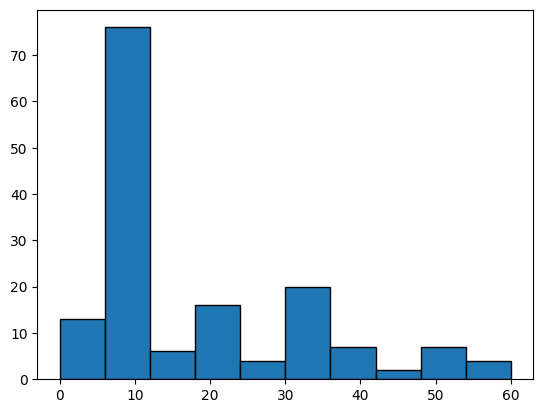

In [116]:
Age = SharkData['Age']
print(Age.dtypes) #check type of age

Age = Age.str.lower() #convert to all lowercase for better matching 

#replace common values with age I think matches 
Age = Age.replace(("middle age", "adult", r'"middle-age"', "(adult)"), 45)

Age = Age.replace(("young", r'"young"', "minor", "a minor", "teen", "a teen", "teens"), 17)
Age = Age.replace(("elderly"), 70)
Age = Age.astype(str) #convert all ages to strings for regex matching 

def regex_clean(value):
    if isinstance(value, str): #ensure everything passed in can be regex matched
        if re.match(r'[0-9]+½', value): #match values 
            cleaned = re.sub(r'½', '', value) #cut off the non-number 
            cleaned = pd.to_numeric(cleaned) #convert to numeric
            return cleaned #return numeric with just numbers 
        elif re.match(r'[0-9]+\s*months?', value):
            cleaned = 0
            cleaned = pd.to_numeric(cleaned)
            return cleaned
        elif re.match(r"[0-9]+[r']?s", value):
            cleaned = value[:2]
            cleaned = pd.to_numeric(cleaned)
            return cleaned
        elif re.match(r'[0-9]+\s*or\s*[0-9]+', value):
            cleaned = value[:2]
            cleaned = pd.to_numeric(cleaned)
            return cleaned 
        elif re.match(r'[0-9]+\s*&\s*[0-9]+', value):
            cleaned = value[:2]
            cleaned = pd.to_numeric(cleaned)
            return cleaned 
        elif re.match(r'[0-9]+\s*to\s*[0-9]+', value):
            cleaned = value[:2]
            cleaned = pd.to_numeric(cleaned)
            return cleaned 
        elif re.match(r'[0-9]+\s*and\s*[0-9]+', value):
            cleaned = value[:2]
            cleaned = pd.to_numeric(cleaned)
            return cleaned 
        elif re.match(r'^[0-9]?$', value):
            value = pd.to_numeric(value)
            return value
        else:
            return 99 #return 99 for extra values 
    else:
        return 99

Age = Age.apply(regex_clean) #apply the regex to all of the ages 
print(Age.unique()) #see unique values of age

AgeHist = Age[Age!= 99] #remove all of the extra values for the histogram, as they are outliers

plt.hist(AgeHist, bins=10, edgecolor='black') #graph the numeric values 


In [140]:
SharkData['Sex'] = SharkData['Sex'].str.strip() #strip off trailing whitespaces

print(SharkData['Sex'].unique()) #check unique values of Sex before cleaning
SharkData['Sex'] = SharkData['Sex'].replace(("M X 2"), 'M') #can tell this value is a male
SharkData['Sex'] = np.where(SharkData['Sex'].isin(['M', 'F']), SharkData['Sex'], 'Unknown') #make all others Unknown

male_count = (SharkData['Sex'] == 'M').sum() #sum of males
total_count = SharkData['Sex'].count() #sum of total rows

male_freq = male_count / total_count #calculate frequency of males 
print(male_freq)

['M' 'F' 'Unknown']
0.8032036613272311


In [ ]:
SharkData['Type'] = SharkData['Type'].str.strip() #remove trailing whitespace

def assign_type(value): #create function to assign unknown unless it is unprovoked or provoked 
   if (value == "Unprovoked" or value == "Provoked"):
        return value  
   else:
        return "Unknown"
   
SharkData['Type'] = SharkData['Type'].apply(assign_type) #assign unknowns to all not provoked/unprovoked

print(SharkData['Type'].unique())

unprovoked_count = (SharkData['Type'] == 'Unprovoked').sum() #sum of unprovoked 
total_count = SharkData['Type'].count() #sum of total rows

print(unprovoked_count / total_count) #calculate frequency of unprovoked attacks 

['Unprovoked' 'Provoked' 'Unknown']
5153
0.7369851258581236


In [128]:
Fatal = SharkData['Fatal Y/N']
print(Fatal.unique()) #check unique values of column 

Fatal = Fatal.str.upper().str.strip() #make all uppercase and strip whitespaces
Fatal = Fatal.replace(("Y X 2"), 'Y') #can tell this value is a yes
Fatal = np.where(Fatal.isin(['Y', 'N']), Fatal, 'Unknown') #all other values that arent Y/N changed to 'Unknown'

print(Fatal)

['N' 'Y' 'F' 'M' nan 'NQ' 'UNKNOWN' 'Y X 2']
['N' 'N' 'N' ... 'Y' 'Y' 'Y']


In [157]:
s_tab = pd.crosstab(SharkData['Type'], SharkData['Sex'], rownames=['type'], colnames=['sex'])
print(s_tab)

men_prov = s_tab.loc['Provoked', 'M']
men_unprov = s_tab.loc['Unprovoked', 'M']
men_fract = men_unprov / (men_unprov + men_prov)
print(men_fract) #the proportion of mens attacks that were unprovoked 

wom_prov = s_tab.loc['Provoked', 'F']
wom_unprov = s_tab.loc['Unprovoked', 'F']
wom_fract = wom_unprov / (wom_unprov + wom_prov)
print(wom_fract) #the proportion of womens attacks that were unprovoked 
#It seems like womens attacks were more likely to be unprovoked than mens attacks 

sex           F     M  Unknown
type                          
Provoked     31   548       60
Unknown      91   754      355
Unprovoked  670  4314      169
0.8872891814068284
0.9557774607703281


In [160]:
tab = pd.crosstab(SharkData['Type'], Fatal, rownames=['type'], colnames=['fatal'])
print(tab)

prov_fatal = tab.loc['Provoked', 'Y']
prov_not = tab.loc['Provoked', 'N']
prov_fract = prov_fatal / (prov_fatal + prov_not)
print(prov_fract) #the proportion of provoked attacks that were fatal 

unprov_fatal = tab.loc['Unprovoked', 'Y']
unprov_not = tab.loc['Unprovoked', 'N']
unprov_fract = unprov_fatal / (unprov_fatal + unprov_not)
print(unprov_fract)#proportion of unprovoked attacks that were fatal
#The attack is more likely to be fatal when the attack is unprovoked 

fatal          N  Unknown     Y
type                           
Provoked     609        9    21
Unknown      449      554   197
Unprovoked  3823       78  1252
0.03333333333333333
0.24669950738916255


In [162]:
f_tab = pd.crosstab(SharkData['Sex'], Fatal, rownames=['type'], colnames=['fatal'])
print(f_tab)

prop = f_tab.div(f_tab.sum(axis=1), axis=0)

male_fatal = prop.loc['M', 'Y']
print(male_fatal) #the proportion of male attacks that are fatal
wom_fatal = prop.loc['F', 'Y']
print(wom_fatal) #the proportion of female attacks that are fatal
#the attack is more likely to be fatal when the victim is female 

fatal       N  Unknown     Y
type                        
F         602       70   120
M        3917      459  1240
Unknown   362      112   110
0.2207977207977208
0.15151515151515152


In [176]:
#print(SharkData['Species '])
SharkData['Species '] = SharkData['Species '].str.lower() #make all species lowercase
whitecount=0

def is_white(value): #create a function that checks if the species has white in it anywhere 
    global whitecount
    if isinstance(value, str):
        pattern = "white"
        words = value.split()
        for word in words:
            if word == pattern:
                whitecount += 1 
    return value

SharkData['Species '] = SharkData['Species '].apply(is_white) #counts all of the rows to see if they have white
total_species = SharkData['Species '].count() #get the total number of entries
print(whitecount / total_species) #find the proportion of total entries that are white 

0.18316062176165804


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1) The most recent US census, the 2020 one, had two questions on race, one asking if the respondent identifies as 'Hispanic or Latino' or not, the other asking which of these 5 categories people identify as, 'American Indian or Alaska Native' , 'Asian', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', or 'White', although for this question you can select multiple.   
2) It is important to know this information, as it can be used in studies later to discover things. Many demographers will follow trends of where people are moving which can tell a political story. If specific racial groups are facing problems significantly more than others, it is important to be aware of these differences to be on the lookout for any potential inequalities in society that could be causing this. For this it is important to have high quality data that is easy to clean so you can get conclusions easily.   
3) Until 2000, people were not able to identify as multiple races on the census. This being added is important to classify the US population more accurately and represent individuals belonging to multiple racial groups. In 2024 the census also decided to add a category for people who identify as Middle Eastern or North African. With something like race it is difficult to classify in a simple question that has limited options but still represents the population. There will always be some groups that are not represented, but it is important to consider ways to change things as the population changes to represent it accurately. For other surveys, it is important to consider ways to best reflect the population.   
4) The census asks a question on a person's sex, the options being Male and Female. I think in order to better this they could have an additional question on gender that has more options to better represent the American populace. It is better to have more information on how people identify to seek out differences from the norm that would need to be further studied.   
5) When there are missing values it may be hard to reach conclusions or find out any information that could be useful. At the same time, many do not feel comfortable disclosing information like this or are concerned about it for privacy reasons. With something sent out to such mass amounts of people, there are also inevitable misunderstandings of the questions or people incorrectly reading the options, especially with a question like race. When cleaning the data it is harder to use all of it when there are missing data that you can not just impute with other data. It might be best practice to inform people better of how to properly fill out the questions and what the data is used for.   
6) If there was an algorithm to impute these values, I would be concerned what it is based on. If it is imputing the values based on the answers to other questions, then I would worry that you can no longer reach conclusions about these questions. For example, if they found a strong correlation between sex and income, and they then started to impute sex based on income, you would no longer be able to derive any meaningful conclusions on the relationship between sex and income. Given that you are trying to get information on people, it wouldn't make sense to algorithmically simulate this data. 